In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os 

In [111]:
u_data = pd.read_csv("../data/raw/u.data", header=None, sep="\t")
u_data.rename(
    columns={0: "user_id", 1: "item_id", 2: "rating", 3: "timestamp"},
    inplace=True,
)

In [112]:
u_data

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [113]:
u_item = pd.read_csv(
    "../data/raw/u.item", delimiter="|", encoding="latin-1", header=None
)
u_item.drop(u_item.columns[3], axis=1, inplace=True)
u_item = u_item.rename(
    columns={
        0: "movie_id",
        1: "movie_title",
        2: "release_date",
        4: "IMDB_url",
        5: "unknown",
        6: "Action",
        7: "Adventure",
        8: "Animation",
        9: "Children's",
        10: "Comedy",
        11: "Crime",
        12: "Documentary",
        13: "Drama",
        14: "Fantasy",
        15: "Film-Noir",
        16: "Horror",
        17: "Musical",
        18: "Mystery",
        19: "Romance",
        20: "Sci-Fi",
        21: "Thriller",
        22: "War",
        23: "Western",
    }
)

In [119]:
u_item

,movie_id,movie_title,release_date,IMDB_url,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [114]:
u_user = pd.read_csv('../data/raw/u.user', header=None, sep='|')
u_user = u_user.rename(columns={0: "user_id", 1: "age", 2: "gender", 3: "occupation", 4: "zip_code"})

In [115]:
print(u_user.columns)

Index(['user_id', 'age', 'gender', 'occupation', 'zip_code'], dtype='object')


Here you can see the distribution between female and male users


Text(0.5, 1.0, 'Gender Distribution')

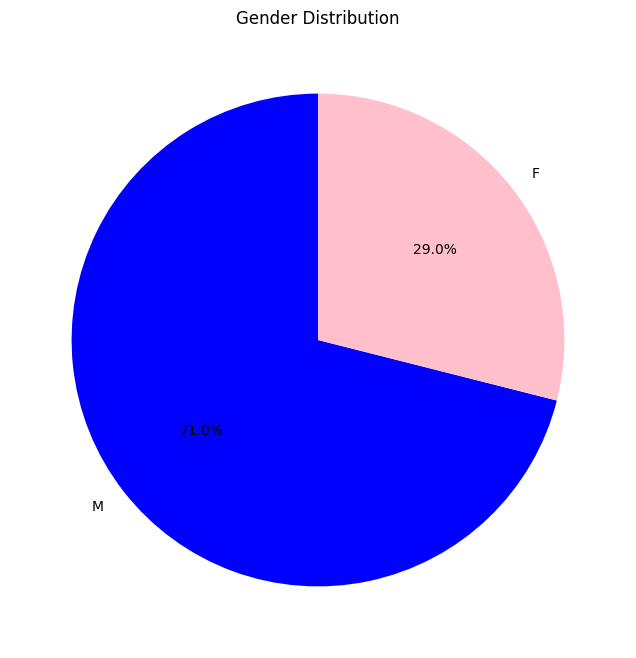

In [116]:
gender_counts = u_user['gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'pink'])
plt.title('Gender Distribution')

Here you can see the distribution between ages


<Axes: xlabel='age', ylabel='Count'>

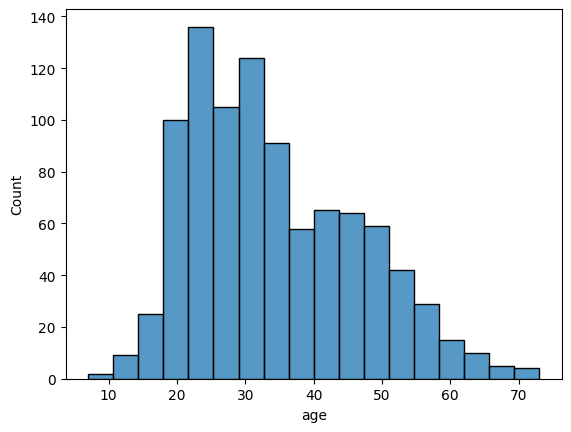

In [117]:
sns.histplot(x="age", data=u_user)

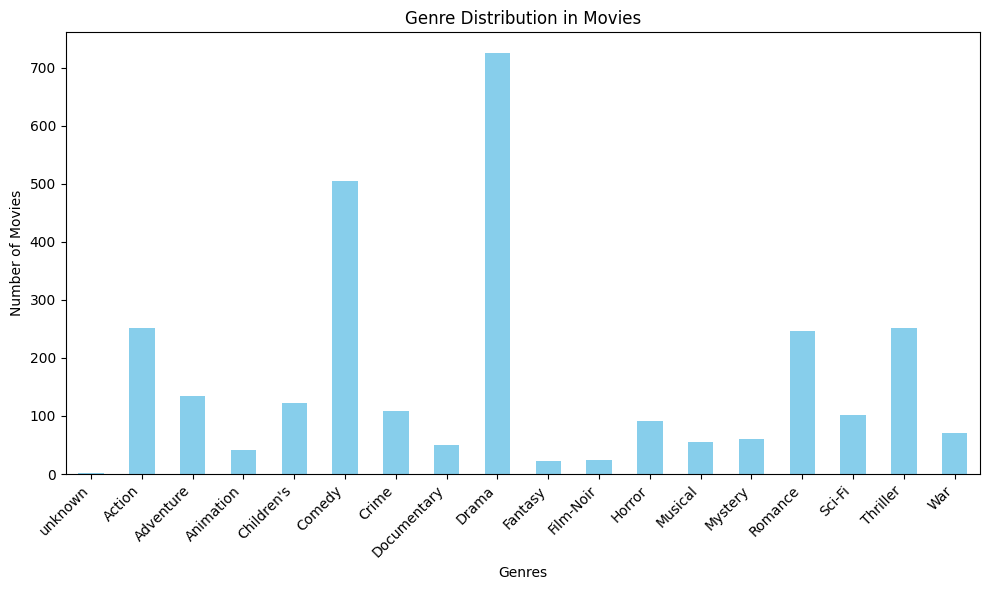

In [120]:
genres = u_item.iloc[:, 4:-1]

genre_counts = genres.sum()


plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Genre Distribution in Movies')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

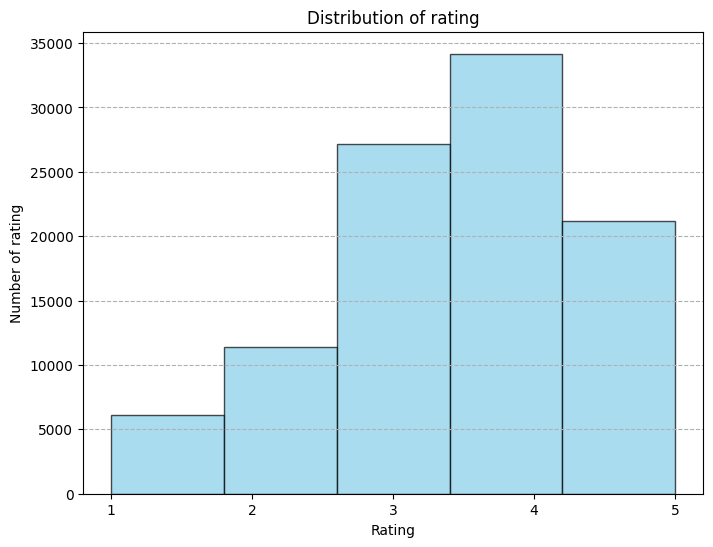

In [126]:
plt.figure(figsize=(8, 6))
plt.hist(u_data['rating'], bins=5, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of rating')
plt.xlabel('Rating')
plt.ylabel('Number of rating')
plt.xticks(range(1, 6))  
plt.grid(axis='y', linestyle='--', alpha=1)
plt.show()

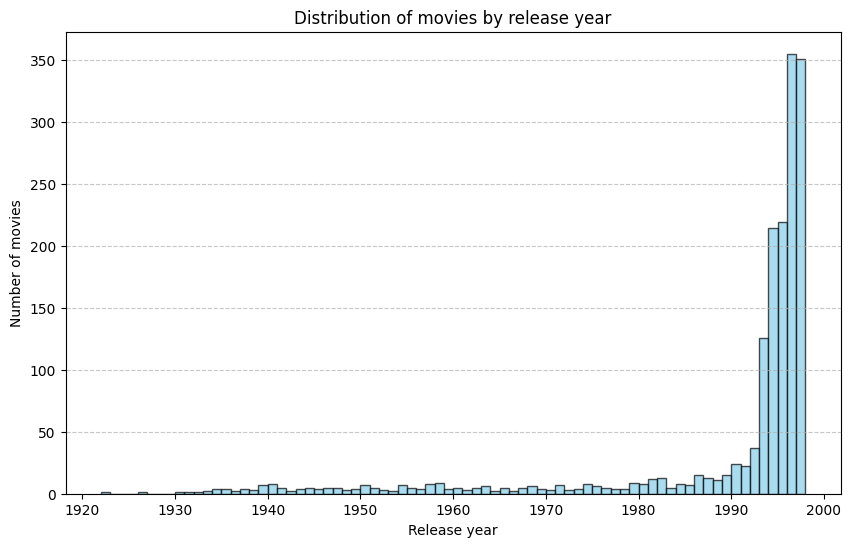

In [133]:
new = pd.DataFrame()
new['release_date'] = pd.to_datetime(u_item['release_date'], format='%d-%b-%Y')

new['release_year'] = new['release_date'].dt.year
new = new.dropna(subset=['release_year'])

plt.figure(figsize=(10, 6))
plt.hist(new['release_year'].astype(int), bins=range(new['release_year'].astype(int).min(), new['release_year'].astype(int).max() + 1), color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of movies by release year')
plt.xlabel('Release year')
plt.ylabel('Number of movies')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()